## Prediction of flight delay

### Team members: 
*Sumedh Kumar Prasad*   
*Mohammed Thouseef*  
*Aishwarya Sarda*   
*Venkata Surya Teja Bhaskarabhatla*  

In [1]:
import pandas as pd
import numpy as np

In [186]:
df = pd.read_csv("datasets/MasterDF_Updated.csv")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163635 entries, 0 to 6163634
Data columns (total 48 columns):
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
AirlineID               int64
Carrier                 int8
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                  int16
OriginCityName          int16
OriginState             int8
OriginStateFips         int64
OriginStateName         int8
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                    int16
DestCityName            int16
DestState               int8
DestStateFips           int64
DestStateName           int8
DestWac                 int64
DepDelay                float64
DepDelayMinutes         float64
DepDel15                float64
DepartureDelayGroups    float64
TaxiOut       

In [188]:
col_list = ['FlightDate', 'UniqueCarrier', 'TailNum', 'DepTimeBlk', 'CRSArrTime', 'ArrTime', 'ArrTimeBlk',
            'Year', 'CRSDepTime', 'DepTime', 'ArrDel15', 'DepDel15', 'DepDelayMinutes', 
            'ArrDelay', 'DepDelay', 'DepDelayMinutes', 'Diverted', 'TaxiIn', 'TaxiOut', 'CRSElapsedTime','ActualElapsedTime']
df = df.drop(col_list, axis=1)

In [189]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
cat_columns = df.select_dtypes(['category']).columns
for col in cat_columns:
    df[col] = df[col].cat.codes

In [190]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.6)

In [191]:
X_train = train.drop('Delayed', axis=1)
y_train = train['Delayed']

X_test = test.drop('Delayed', axis=1)
y_test = test['Delayed']

##### Create a data frame to capture metrics

In [195]:
col_list = ["Model", "Accuracy", "Precision", "Recall"]
Metrics_DF = pd.DataFrame(columns= col_list)
temp_DF = pd.DataFrame(columns= col_list)

In [196]:
Metrics_DF

,Model,Accuracy,Precision,Recall


In [197]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#### 1.Logistic regression model

In [198]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
y_pred = LR_Model.predict(X_test)

In [200]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Delayed,,
0,2897097,0
1,414617,386467


In [201]:
accuracy_score(y_test, y_pred)

0.8878862337998059

In [202]:
col_list = X_train.columns
LR_output = pd.DataFrame(LR_Model.coef_, columns=col_list)

In [203]:
LR_output.T

,0
Quarter,-1.215748e-04
Month,-3.557425e-04
DayofMonth,-4.516475e-04
DayOfWeek,-1.056156e-04
AirlineID,-1.745518e-04
Carrier,6.821632e-04
FlightNum,2.062230e-05
OriginAirportID,1.420530e-07
OriginAirportSeqID,3.828398e-07
OriginCityMarketID,-9.571371e-06


In [204]:
temp_DF.loc[1, 'Model']  = "Logistic regression"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_test, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_test, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

#### 2. KNN 

In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [206]:
y_pred = knn_model.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
Delayed,,
0,2811567,85530
1,259386,541698


In [207]:
accuracy_score(y_test, y_pred)

0.9067336076844265

In [208]:
temp_DF.loc[1, 'Model']  = "KNN, n = 3"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_test, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_test, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

#### 3. NB

In [209]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None)

In [210]:
y_pred = NB_model.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
Delayed,,
0,2896814,283
1,196342,604742


In [211]:
accuracy_score(y_test, y_pred)

0.9468319695547622

In [212]:
temp_DF.loc[1, 'Model']  = "NB"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_test, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_test, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

Area under the ROC curve: 0.12259653986535742


Text(0.5,1,'Receiver operating characteristic (ROC)')

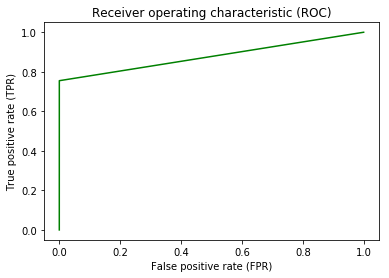

In [213]:
from sklearn.metrics import roc_curve
import matplotlib
from matplotlib import pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = np.trapz(fpr,tpr)
print('Area under the ROC curve: ' + str(auc))
 
fig = plt.figure(1)
plt.plot(fpr,tpr,color='green')
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('Receiver operating characteristic (ROC)')

#### 4. Decision tree

In [214]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [215]:
y_pred = DT_model.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1
Delayed,,
0,2897097,0
1,0,801084


In [216]:
Nodes = pd.DataFrame(DT_model.tree_.__getstate__()["nodes"])
Nodes

feature_importance = pd.DataFrame([X_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance.T 

,0,1
0,Quarter,0
1,Month,0
2,DayofMonth,0
3,DayOfWeek,0
4,AirlineID,0
5,Carrier,0
6,FlightNum,0
7,OriginAirportID,0
8,OriginAirportSeqID,0
9,OriginCityMarketID,0


In [217]:
accuracy_score(y_test, y_pred)

1.0

In [220]:
temp_DF.loc[1, 'Model']  = "Decision tree"
temp_DF.loc[1, 'Accuracy'] = accuracy_score(y_test, y_pred)
temp_DF.loc[1, "Precision"] = precision_score(y_test, y_pred)
temp_DF.loc[1, "Recall"] = recall_score(y_test, y_pred)
Metrics_DF = pd.concat([Metrics_DF, temp_DF], ignore_index=True)

In [221]:
Metrics_DF

,Model,Accuracy,Precision,Recall
0,Logistic regression,0.887886,1,0.48243
1,"KNN, n = 3",0.906734,0.863638,0.676206
2,NB,0.946832,0.999532,0.754905
3,Decision tree,1,1,1


# Thank you